In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
import numpy as np
import pandas as pd
#%pip install matplotlib
import matplotlib.pyplot as plt

#os library looking into the files that you have in oyur server or in your dicrectories
import os

#%pip install opencv-python
import cv2#image processing library

from PIL import Image
%pip install tensorflow
from tensorflow import keras
import tensorflow.keras.layers as k

from tqdm.notebook import tqdm 
#show the progress for the library or how it is wotking or how loop is working

^C
Note: you may need to restart the kernel to use updated packages.


ModuleNotFoundError: No module named 'tensorflow.python'

#In data two cell folder 1 is parasitized images and 2 is uneffected images
#go for parasitised images and observe it having  dimension 130*145 os these is a2d matrix
#for unaffected imgaes are also in 2d
#these images are cell images which has been taken from bigger cell,cross-section image.
#task1 is to take the images and we unifrom the structure of this imges ,all the images before putting in CNN architecture

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img

ModuleNotFoundError: No module named 'tensorflow.python'

In [ ]:
#len("/kaggle/input/malarial-cell-image/Malarial Cell Image Data /malarial_cell_image_data/cell_images/Parasitized")
len("/kaggle/input/malarial-cell-image/Malarial Cell Image Data /malarial_cell_image_data/cell_images/cell_images/Parasitized")

120

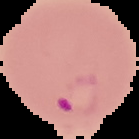

In [ ]:
load_img("/kaggle/input/malarial-cell-image/Malarial Cell Image Data /cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_168.png")

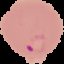

In [ ]:
#now it has been reduced from 64*64 pixelimage size
load_img("/kaggle/input/malarial-cell-image/Malarial Cell Image Data /cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_168.png",target_size=(64,64))

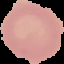

In [ ]:
#now it has been reduced from 64*64 pixelimage size for uninfected
load_img("/kaggle/input/malarial-cell-image/Malarial Cell Image Data /cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png",target_size=(64,64))

In [ ]:
#setup environment of keras
#we use here tensorflow in our environment
os.environ['KERAS_BACKEND']='tensorflow'
#seed make sure that result are not reproducible
np.random.seed(312)

In [ ]:
#now how to prepare the data convert all images to 64*64 and also need to convert this into a numpy array so that it can be readable by CNN architecture in keras
image_dir="/kaggle/input/malarial-cell-image/Malarial Cell Image Data /cell_images/"
size=64
dataset=[]#put our dataset in the list # input values we have
label=[]  #output values we have

In [ ]:
#1st lets work on parasitized images# wealready have defined above the image directory
parasitized_img=os.listdir(image_dir+"Parasitized/")

#for sake of model take 2000 image only
parasitized_img=parasitized_img[:3000]

#so parasitized images called from this directory
#for all images have in above direcotory of parasitized_img it will read img one by one
#enumerate -along with list element it will add a counter to it so "i" will be count and 
#image name will be exact element of the list which is path

#make sure in folder take png file only not garbage values

#along with iterator add tqdm 
for i,img_name in enumerate(tqdm(parasitized_img)):
    if(img_name.split('.')[1]=='png'):#then move in and redad imagee with help of open cv
        image=cv2.imread(image_dir+"Parasitized/"+img_name) #passing the entire path
        #so we have image numpy array which is
        #now to resize image is come form pillow library in which we have module Image
        image=Image.fromarray(image,"RGB")
        image=image.resize((size,size))#mention above
        
        #working with lot of images so take much time
    
        #now these images is resized now we append all the imges to the dataset
        dataset.append(np.array(image))#all the images and again convert thr resized img to nparray
        label.append(0)#because you need to have the classification label also at the time of training
        

  0%|          | 0/3000 [00:00<?, ?it/s]

so now have paratisied images and corresponding label assign to be easy.

In [ ]:
len(parasitized_img)

3000

In [ ]:
#in this path is the entire image
#parasitized_img[0]

In [ ]:
#"C99P60ThinF_IMG_20150918_141001_cell_93.png".split(".")[1]

In [ ]:
#a=cv2.imread("/kaggle/input/malarial-cell-image/Malarial Cell Image Data /cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png")
#print(type(a))
#a # opencv is reading over images as numpy array over here na dtype is numpy array
#here see[[[ ]]] means it is 3 dimension array because images are colored RGB images

In [ ]:
#same resized for uninfected images
#1st lets work on Uninfected images# wealready have defined above the image directory
Uninfected_img=os.listdir(image_dir+"Uninfected/")
Uninfected_img=Uninfected_img[:3000]
#so Uninfected images called from this directory
#for all images have in above direcotory of Uninfected_img it will read img one by one
#enumerate -along with list element it will add a counter to it so "i" will be count and 
#image name will be exact element of the list which is path

#make sure in folder take png file only not garbage values
for i,img_name in enumerate(tqdm(Uninfected_img)):
    if(img_name.split('.')[1]=='png'):#then move in and redad imagee with help of open cv
        image=cv2.imread(image_dir+"Uninfected/"+img_name) #passing the entire path
        #so we have image numpy array which is
        #now to resize image is come form pillow library in which we have module Image
        image=Image.fromarray(image,"RGB")
        image=image.resize((size,size))#mention above
    
        #now these images is resized now we append all the imges to the dataset
        dataset.append(np.array(image))#all the images and again convert thr resized img to nparray
        label.append(1)#because you need to have the classification label also at the time of training
        #for unaffected add label to be 1

  0%|          | 0/3000 [00:00<?, ?it/s]

In [ ]:
len(Uninfected_img)

3000

paratisized and uninfected  both are equally number if there is not balanced there is another tech that is data augmenrtation,by which you can create more images which is lacking in numbers os as to make dataset balanced

so dataset is ready have both the images paraterised and uninfected ones and in label we have final classification labels for both

# **DATA SPLIT**

Here labels are 0 and 1 it will considered as numerical parameter so model might treat 1 >0 but 0 is just a label, there is no quantative ref to it.
so to make sure convert this numerical to categorical valuefor that use keras.

Now convert out data to train and test

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

xtrain,xtest,ytrain,ytest=train_test_split(dataset,to_categorical(np.array(label)),test_size=0.2,random_state=0)#convert labels to numpy array and convert it to categorical data again


# CNN MODEL ARCHITECTURE

The Functional API allows for more complex architectures where layers can have multiple inputs and outputs, whereas the Sequential API is limited to a linear stack of layers.

In [ ]:
INPUT_SHAPE=(size,size,3)# 3is dur to rgb image

#creating input layer
inp=k.Input(shape=INPUT_SHAPE)
#preparing 2 conv layer here and this will work on input(inp) we have
#after pooling apply batchnormalizaion for normalized data that uniformity in the dataset
conv1=k.Conv2D(32,kernel_size=(3,3),activation="relu",padding="same")(inp)#neuron=32
pool1=k.MaxPool2D(pool_size=(2,2))(conv1)#how much to pool then to which layer apply to conv1
norm1=k.BatchNormalization(axis=-1)(pool1)
drop1=k.Dropout(rate=0.2)(norm1)

conv2=k.Conv2D(32,kernel_size=(3,3),activation="relu",padding="same")(drop1)#neuron=32
pool2=k.MaxPool2D(pool_size=(2,2))(conv2)#how much to pool then to which layer apply to conv1
norm2=k.BatchNormalization(axis=-1)(pool2)
drop2=k.Dropout(rate=0.2)(norm2)

#after this conv layer is prepared we need to put it in fully connected layer
flat=k.Flatten()(drop2)

#here use 512 neoren here above 32 feature coming up and 66 size of image
hidden1=k.Dense(512,activation="relu")(flat)
norm3=k.BatchNormalization(axis=-1)(hidden1)
drop3=k.Dropout(rate=0.2)(norm3)

hidden2=k.Dense(256,activation="relu")(drop3)
norm4=k.BatchNormalization(axis=-1)(hidden2)
drop4=k.Dropout(rate=0.2)(norm4)

out=k.Dense(2,activation="sigmoid")(drop4)#2 neoren 1 for paraterised and one for uninfected 

In [ ]:
model=keras.Model(inputs=inp,outputs=out)
model.compile(optimizer='adam',metrics=['accuracy'],
              loss="categorical_crossentropy")

print(model.summary())

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,340,130 (16.56 MB)

 Trainable params: 4,338,466 (16.55 MB)

 Non-trainable params: 1,664 (6.50 KB)

None


Trainable params: 4,338,466 (16.55 MB) these are need to train

#training the model #becacuse we have aready trianed and test data



In [ ]:
#ytrainis in 0 and 1 form also xtrain in 0 and 1 from
history=model.fit(np.array(xtrain),ytrain,
                 batch_size=64,verbose=1,epochs=5,validation_split=0.1,
                 shuffle=False)

In [ ]:
print("test_accuracy:{:,2f}%".format(model.evaluate(np.array(xtest),np.array(ytest))[1]=100))